## Análise sobre o efeito da corrupção na felicidade das pessoas no mundo ##

Objetivos: 
1. Identificar o efeito da corrupção na felicidade das pessoas em diferentes continentes
2. Apontar quais variáveis mais influenciam na felicidade das pessoas
3. Determinar quais aspectos relevantes para a felicidade mais variam entre continentes

In [1]:
#pip install pandas seaborn matplotlib numpy

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [4]:
#Banco de dados
df = pd.read_csv('hap_corrup.csv')
display(df.head())

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [5]:
#Estatística descritiva dos dados
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [6]:
# Identificando se há dados faltantes

df.isna().sum()
#Não há dados faltantes

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [1]:
#Variáveis que não serão utilizadas devido ao alto número de zeros: family, distopia_residual, social_support
#Observado a partir do gráfico abaixo:
#sns.pairplot(df, hue = 'Year')



# Análise Univariada

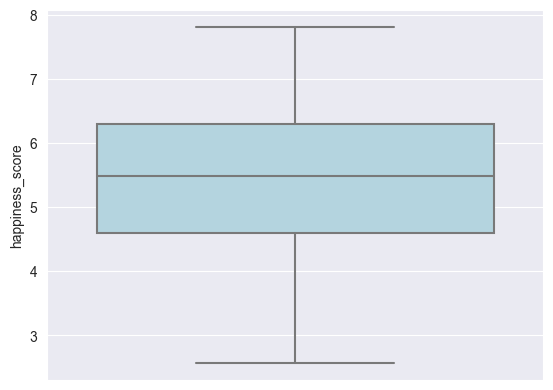

In [74]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'happiness_score', color='lightblue' )
plt.show()
# Verificamos que o score de felicidade apresenta mediana de 5.5. A maior parte dos dado está próximo a média. 
# Os menores scores são valores entre 2 e 3 e os mais altos scores chegam próximo a 8.

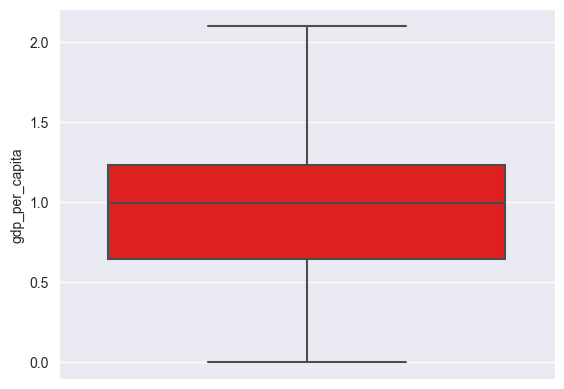

In [73]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'gdp_per_capita', color='red' )
plt.show()
# Nesta análise univariada verificamos Produto Interno Bruto per capita, que varia de 0 a 2.1 possui mediana igual a 1. 
# Podemos visualmente verificar que 75% dos países apresentam gdp menor que 1.25

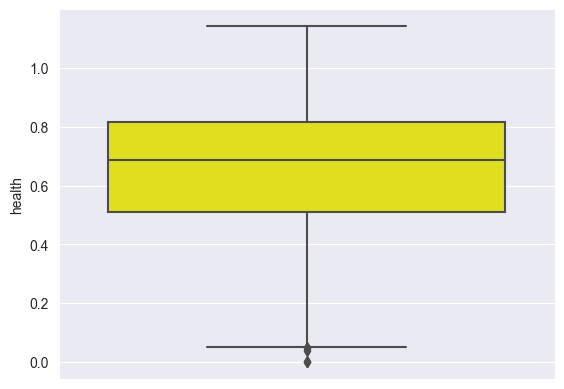

In [118]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'health', color='yellow' )
plt.show()
# Nesta análise verificamos que a a expectativa de vida das pessoas apresenta score mediano de 0.7. A maioria dos dados estão concentrados entre 0.5 e 0.8


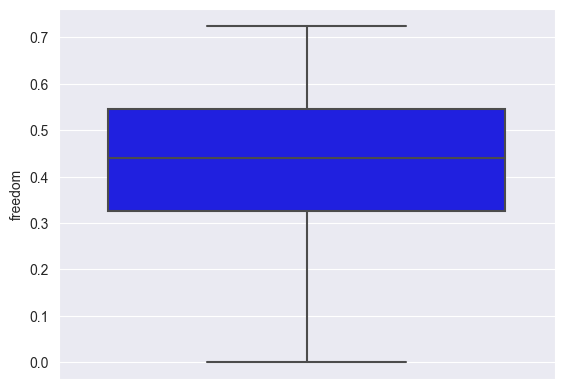

In [72]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'freedom', color='blue' )
plt.show()
#Neste inicie de liberdade, que varia entre 0 e chega próximo a 0.8 a mediana é por volta de 0.45.
# A maioria dos dados (até terceiro quartil) está próximo de 0.55

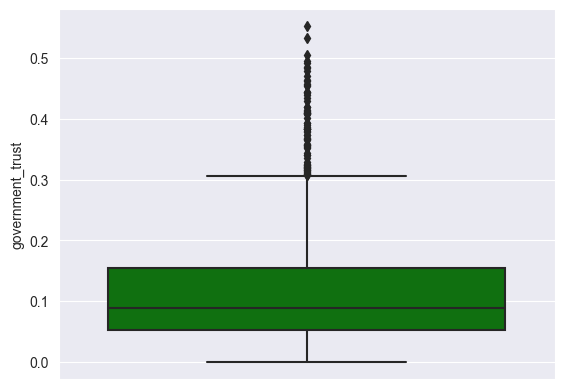

In [71]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'government_trust', color='green' )
plt.show()
# A partir deste gráfico, podemos observar que a confiança no governo pode variar de 0 a 0.5. 
# Constatamos mais de 75% dos dados estão avaixo de 0.2. Países com alta confiança no governo são outliers.

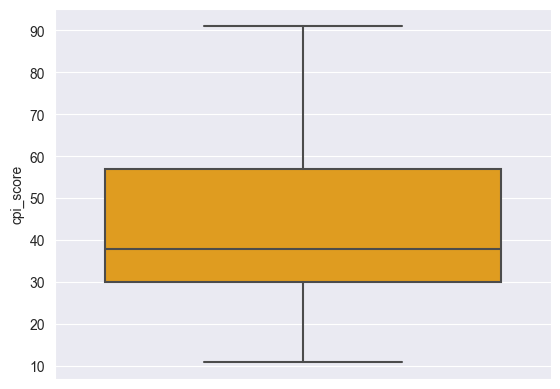

In [70]:
sns.set_style("darkgrid")
sns.boxplot(data=df, y = 'cpi_score', color='orange' )
plt.show()
# Neste indice de percepção de corrupção, um indicativo de coorrupção nos países, podemos verificar que p score varia de 10 a 90.
#Quanto maior o score menos corrupto o governo é percebido e quanto menor o score, mais corrupto é o governo
# A mediana desta medida está próximo de 40, e mais de 75% dos dados está abaixo de 60.


# Análise Bivariada

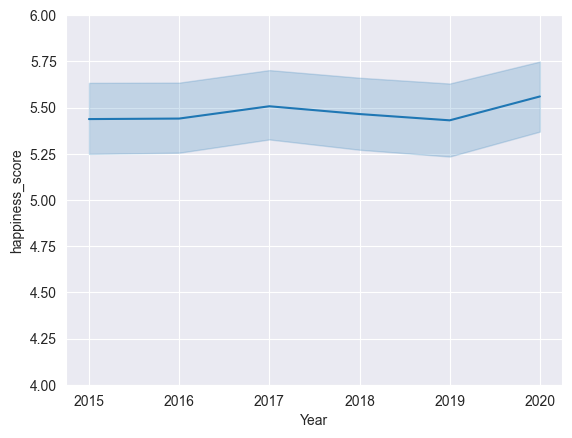

In [132]:
sns.set_style("darkgrid")
sns.lineplot(data=df, x='Year', y='happiness_score', estimator='mean')
plt.ylim(4,6)
plt.show()
# Neste gráfico, verificamos a média anual de felicidade no mundo. verificamos que a média de felicidade anual se mantém estável de 2015 a 2020

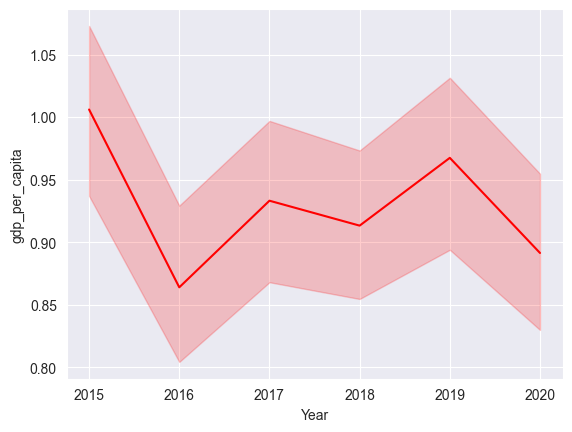

In [67]:
sns.set_style("darkgrid")
sns.lineplot(data=df, x='Year', y='gdp_per_capita', estimator='mean', color = 'red')
plt.show()
# Neste gráfico, é possível verificar uma queda do PIB per capita de 2015 a 2016, possivelmente reflexo da crise econômica mundial em 2016, 
# e sua subsequente lenta recuperação nos demais anos analisados.

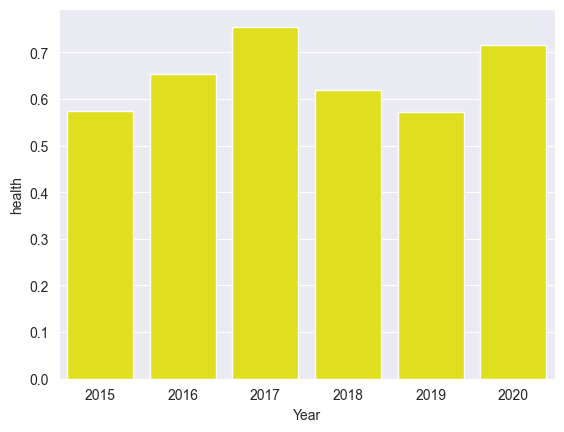

In [124]:
sns.set_style("darkgrid")
sns.barplot(data=df, x='Year', y='health', estimator='mean', color = 'yellow', errorbar=None)
plt.show()

#Neste gráfico podemos verificar a estimativa de vida das pessoas ao longo de cinco anos. A estimativa média de 2017 e 2020 foram as maiores.

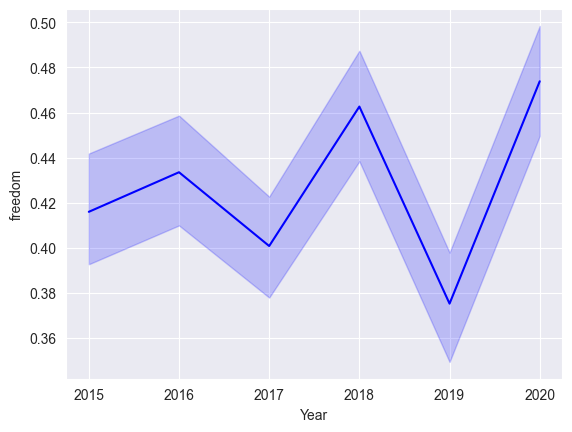

In [66]:
sns.set_style("darkgrid")
sns.lineplot(data=df, x='Year', y='freedom', estimator='mean', color = 'blue')
plt.show()
#A sensação de liberdade em 2019 apresentou uma queda. Segundo pesquisa realizada no "The Global Expression Report 2019/2020", a principal causa
# para as pessoas terem essa percepção foi devido ao início da pandemia no final deste ano. No final de 2019, muitos governos, 
# como medida essencial para conter a propagação do vírus, proibiram seus cidadões de circular livremente nas ruas, o que afetou esta percepção das pessoas.
# Apesar de ter sido uma medida necessária, muitos governos autoritários usaram esta crise de saúde como um pretexto para controlar a liberdade de expressão
# nas ruas e mídias online.

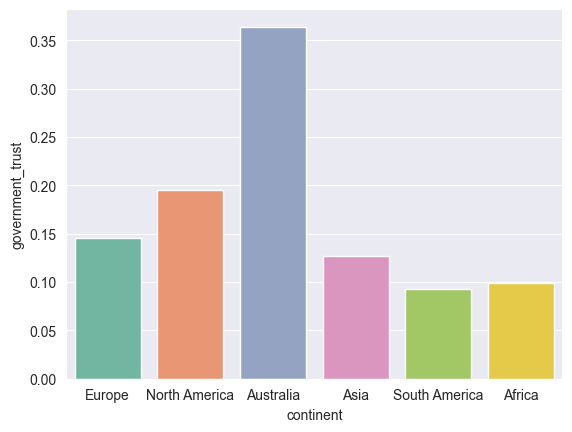

In [65]:
sns.set_style("darkgrid")
sns.barplot(data=df, x='continent', y='government_trust', estimator='mean', palette= 'Set2', errorbar=None)
plt.show()
# Neste gráfico Verificamos na Oceania, onde se localiza a Austrália, é o local onde há maior confiança no governo. Em seguida temos a América do Norte 
# e a Europa. Os países da América do Sul são os que apresentam menor confiança no governo.

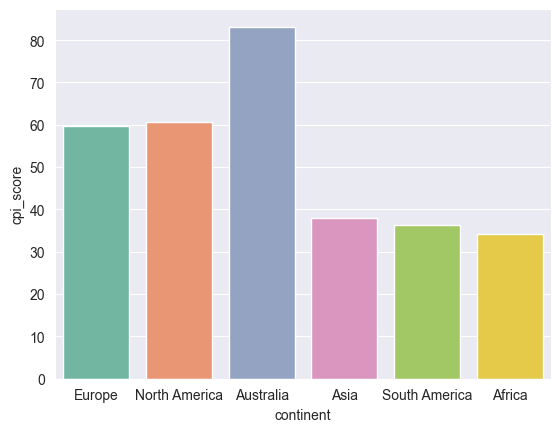

In [64]:
sns.set_style("darkgrid")
sns.barplot(data=df, x = 'continent', y = 'cpi_score', estimator='mean', palette= 'Set2', errorbar=None )
plt.show()
#A partir deste dado podemos verificar que nos continentes da Austrália, a América do Norte e Europa são percebidos como menos corruptos.
#Da mesma forma, Os paíeses da América do Sul, África e Asia, possuem governos percebidos como mais corruptos.

# Análise multivariada #

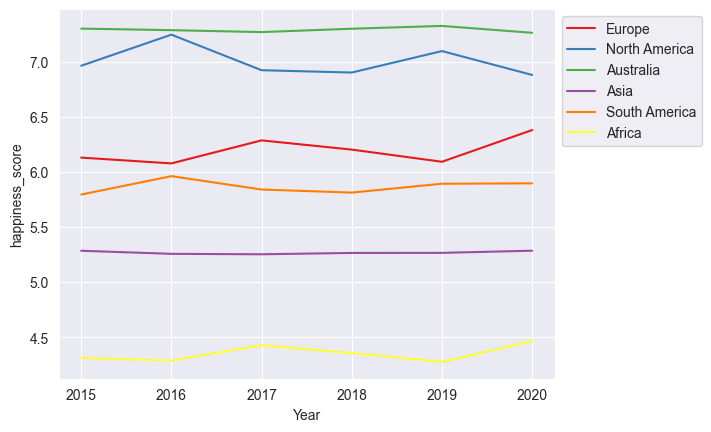

In [75]:
#Como é a felicidade por continente ao longo do tempo?
sns.set_style("darkgrid")
sns.lineplot(data=df, x='Year', y= 'happiness_score', hue='continent', errorbar=None, palette='Set1')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#De acordo com a base de dados, o continente mais feliz é a Australia (Oceania) e o menos feliz é a África.
#Esses scores parecem se manter estáveis ao longo do tempo.

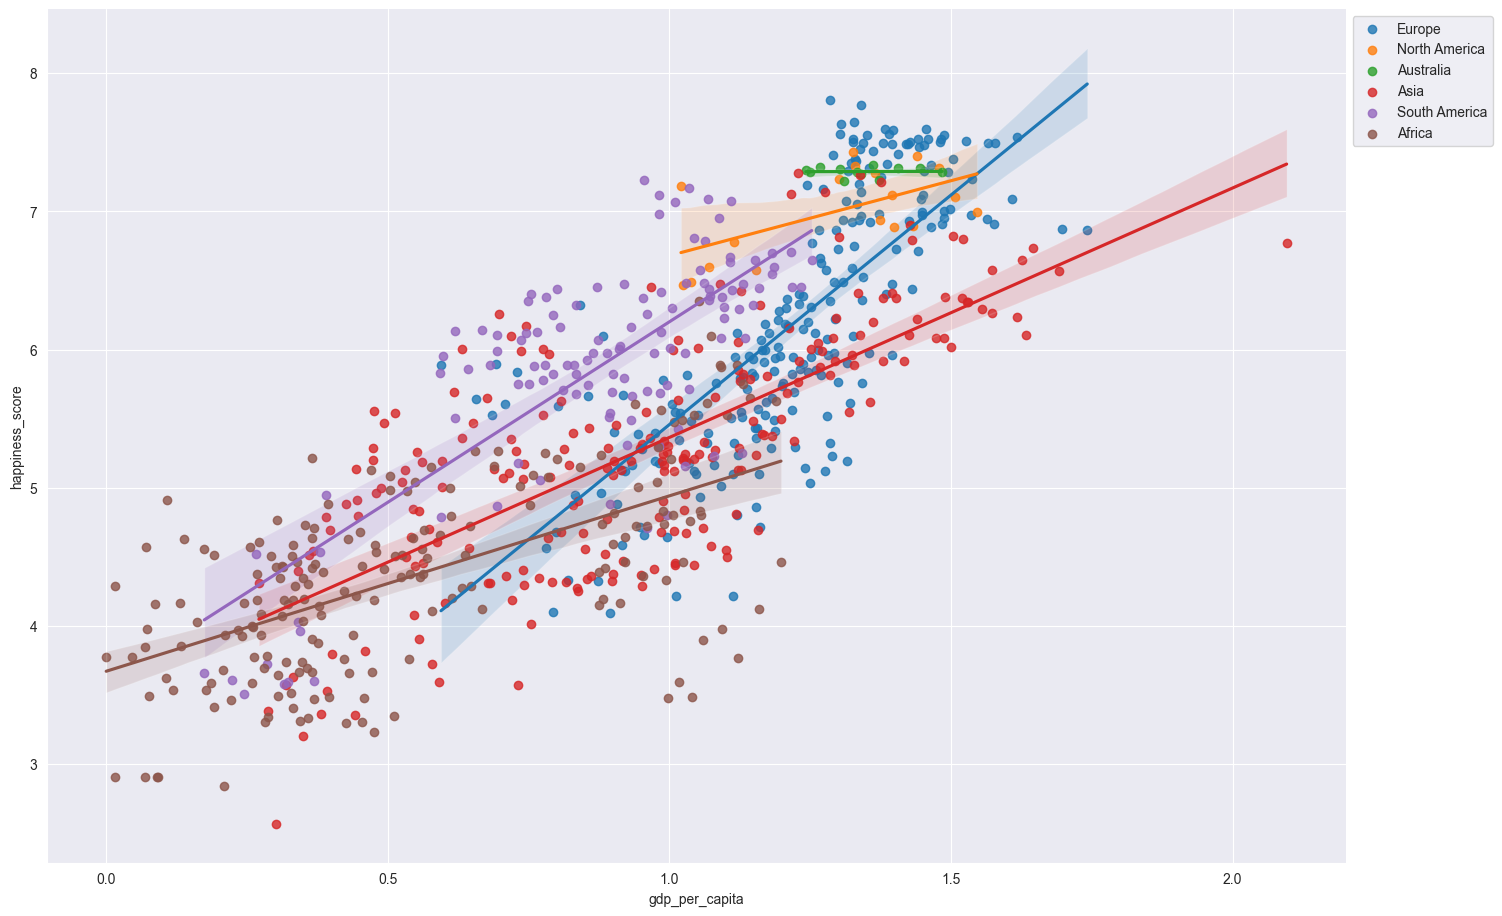

In [107]:
#Relação entre renda per capita e score de felicidade por continente

sns.lmplot(data=df, x='gdp_per_capita', y= 'happiness_score', hue='continent', legend=False).fig.set_size_inches(15, 10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Aqui conseguimos identificar correlações positivas. Quanto maior o PIB maior a felicidade das pessoas.
#Na Europa, temos o mínimo de gdp_per_capita já mais elevado que os demais continentes 
# Na África, uma maior gdp_per_capita não parece influenciar no grau de felicidade 

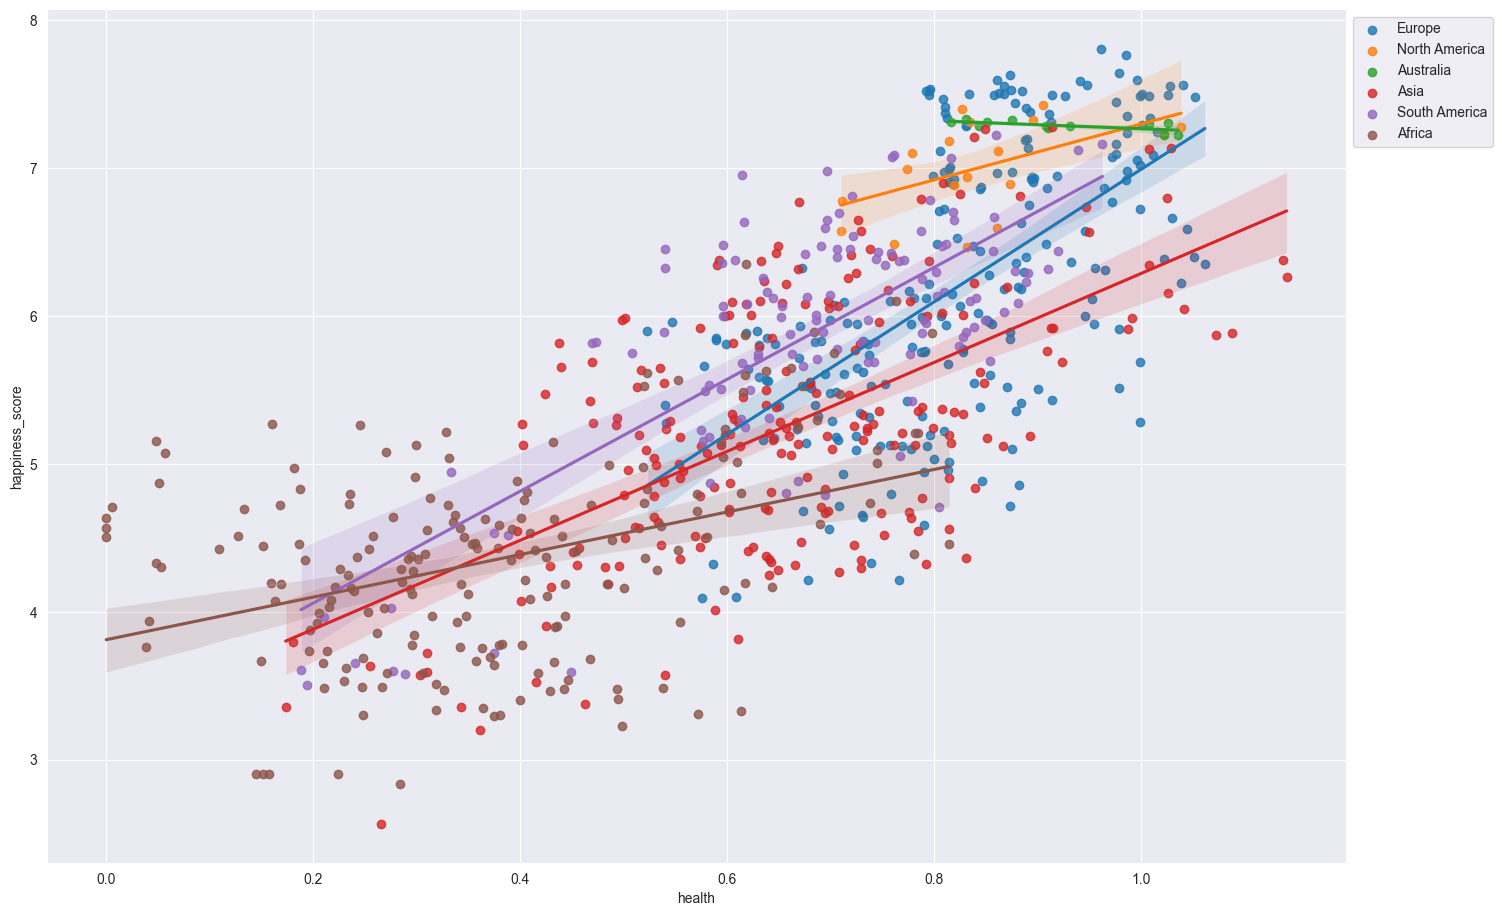

In [126]:
#Relação entre confiança no governo e score de felicidade por continente

sns.lmplot(data=df, x='health', y= 'happiness_score', hue='continent', legend=False).fig.set_size_inches(15, 10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#No geral, podemos perceber que quanto maior a expectativa de vida, mais as pessoas são felizes.
#É interessante observar que continentes com maior índice de felicidade têm maior índice de saúde
#Entretanto, o aumento, ainda que pequeno, nas condições de saúde na África não parece impactar a felicidade
#Esses dados fazem crer que é necessário ter um índice mínimo de saúde para que ocorra impacto na felicidade



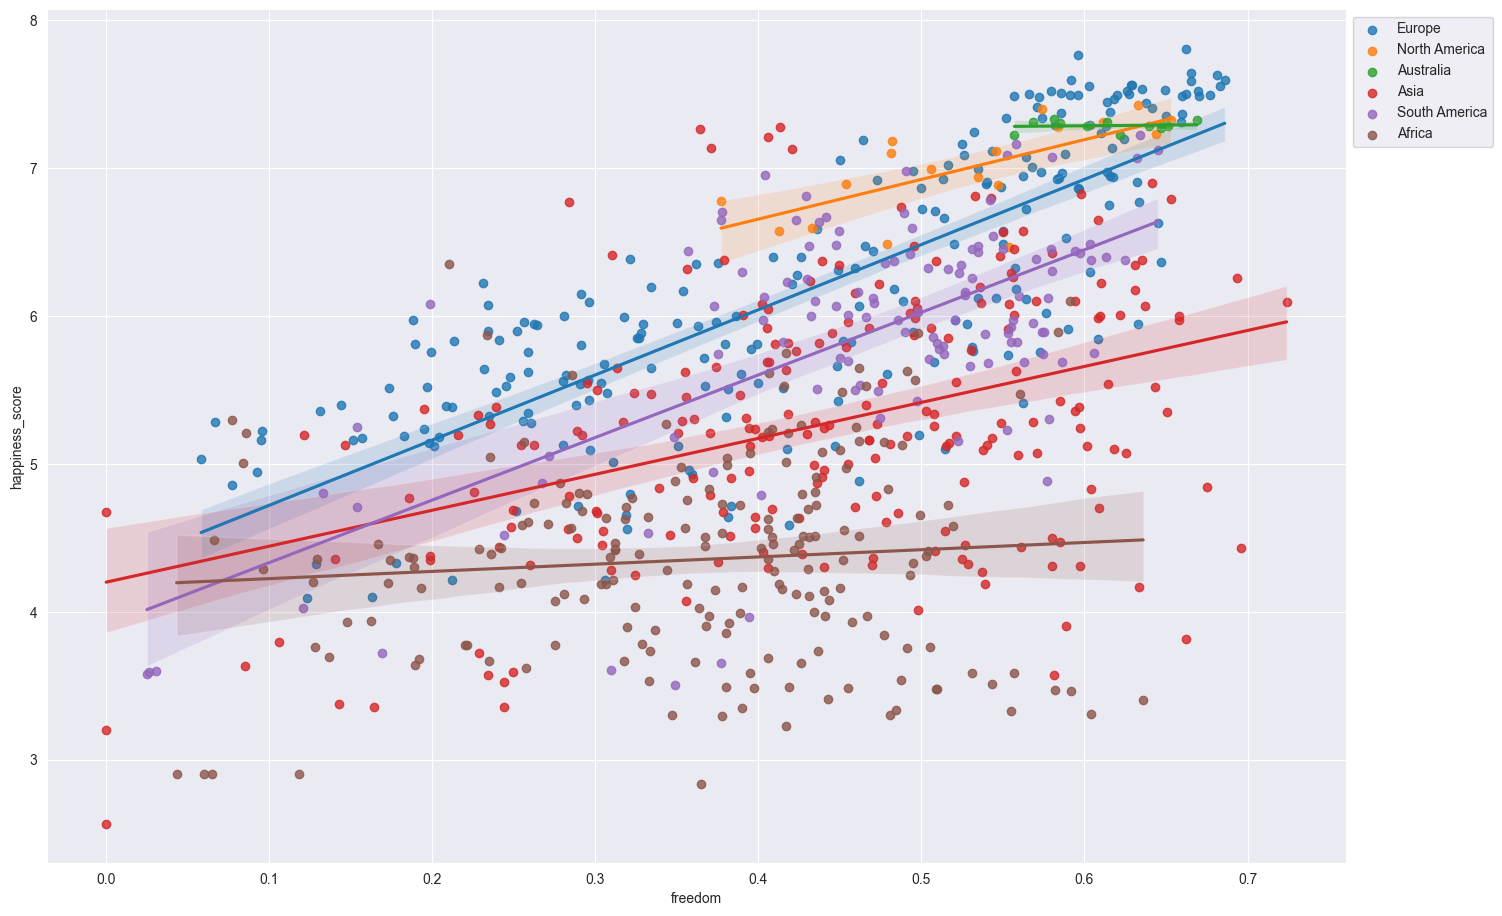

In [127]:
# rrelação entre a Liberdade e a felicidade

sns.lmplot(data=df, x='freedom', y= 'happiness_score', hue='continent',  legend=False).fig.set_size_inches(15, 10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Neste gráfico podemos verificar que, no geral, quanto mais liberdade mais felizes são as pessoas.
# No continente africano, com baixo score de felicidade, e na Austrália, com alto score de felicidade, verificamos que essa correlação é neutra

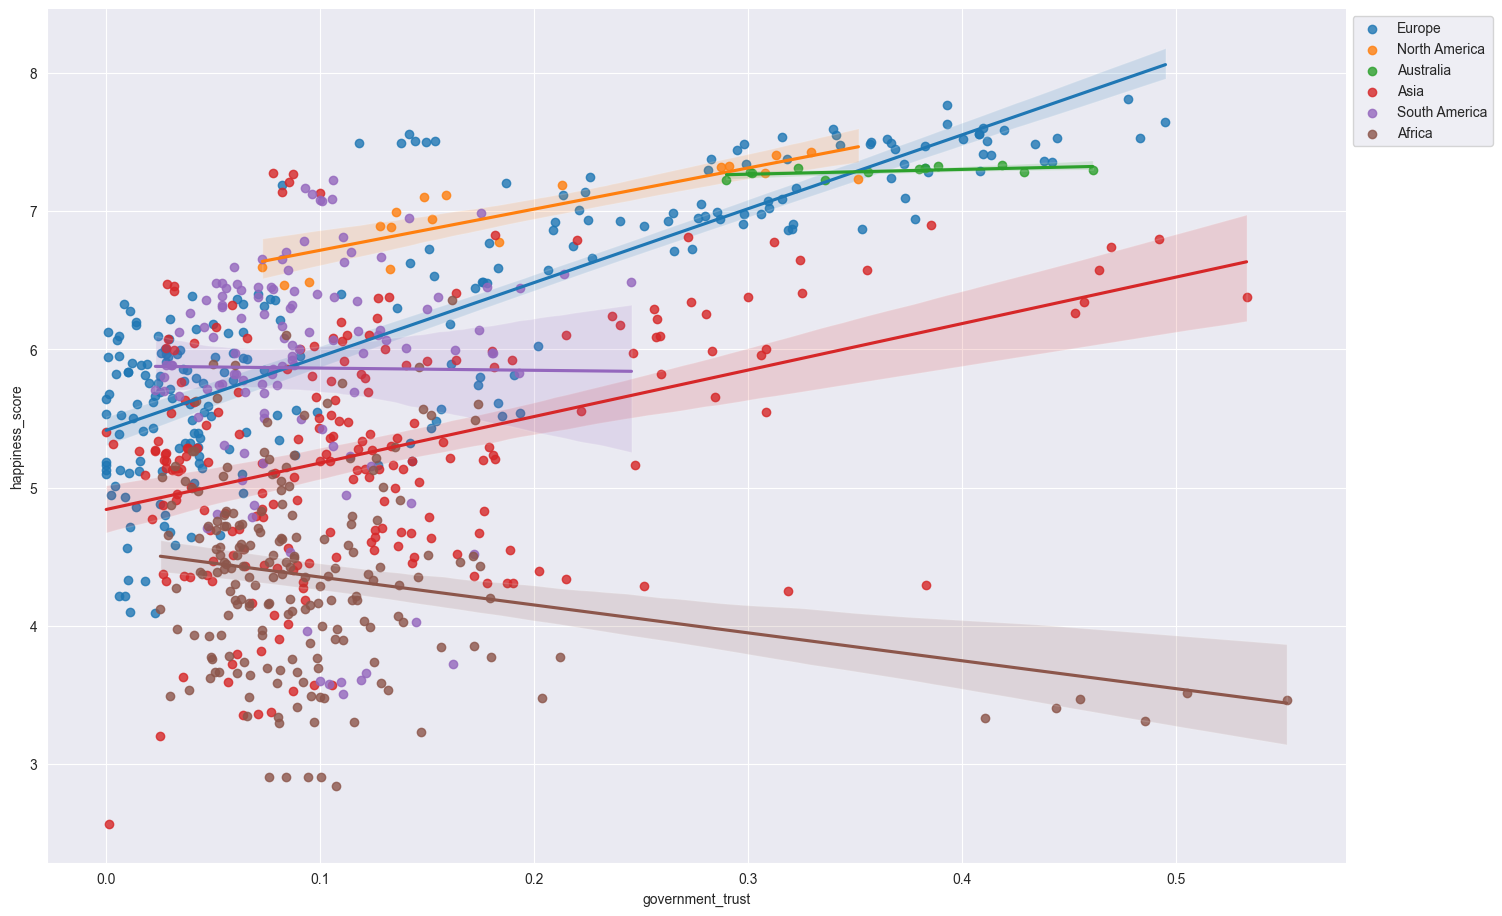

In [111]:
#Relação entre confiança no governo e score de felicidade por continente

sns.lmplot(data=df, x='government_trust', y= 'happiness_score', hue='continent', legend=False).fig.set_size_inches(15, 10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#Aqui conseguimos ver que essa não é uma relação absoluta
#Na América do Sul, a confiança no governo é baixa, mas o score de felicidade varia bastante, ocupando patamares altos
#Já na África, nos locais onde a confiança no governo é mais alta, o score de felicidade continua baixo, havendo uma correlação negativa.

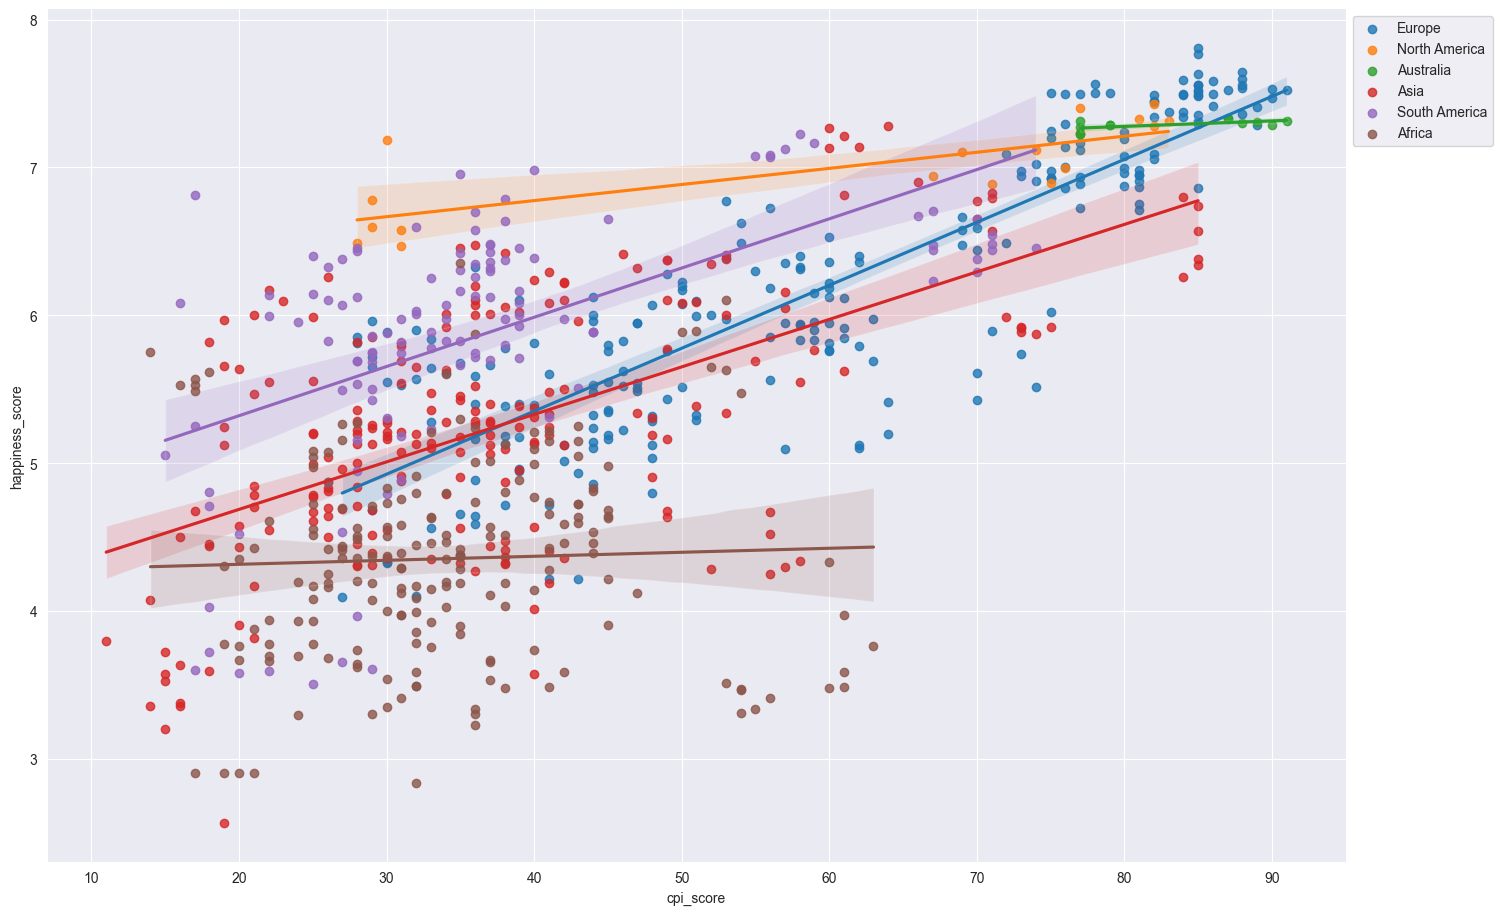

In [128]:
#Relação entre a percepção de corrupção e felicidade por continent 

sns.lmplot(data=df, x='cpi_score', y= 'happiness_score', hue='continent',  legend=False).fig.set_size_inches(15, 10)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#É possível perceber que esta é uma relação positiva na maioria dos continentes.
#Quanto maior o score de CPI, ou seja, menos corrupto o governo aparenta ser, mais as pessoas são felizes.
#Já na África, nos locais onde o índice de CPI é mais alta, o score de felicidade continua baixo.


# Conclusões Finais

Neste estudo verificamos que diversos fatores, como PIB per capita, expectativa de vida, liberdade, confiança no governo e a perceção de ausência ou baixa corrupção no governo impactam diretamente na felicidade das pessoas.

Verificamos que mesmo em países com menor corrupção e mais confiança no governo, se não há PIB per capita alto, boa expectativa de vida e liberdade de expressão, as pessoas não são felizes.

Desta forma, concluímos que a corrupção impacta na felicidade das pessoas, embora diversas variáveis relacionadas a qualidade de vida são essenciais para atingir a felicidade.

 